In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
from textblob import TextBlob

In [19]:
df = pd.read_csv('pandas_df.csv')

In [20]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519


In [21]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).polarity)

In [22]:
df.describe()

,year,month,day,favorite_count,retweet_count,word_count,char_count,average_word_len,polarity
count,294528.0,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000
mean,2017.0,7.327738,16.224797,0.975092,5013.614485,18.739149,128.135783,6.200876,0.057429
std,0.0,1.819165,7.757612,163.427522,15043.815285,5.266737,26.182777,1.437555,0.281700
min,2017.0,3.000000,1.000000,0.000000,0.000000,2.000000,11.000000,2.722222,-1.000000
25%,2017.0,6.000000,10.000000,0.000000,1.000000,15.000000,120.000000,5.130435,0.000000
50%,2017.0,7.000000,17.000000,0.000000,37.000000,20.000000,140.000000,5.950000,0.000000
75%,2017.0,9.000000,23.000000,0.000000,1780.000000,23.000000,140.000000,6.833333,0.193750
max,2017.0,10.000000,31.000000,81655.000000,155397.000000,78.000000,811.000000,55.500000,1.000000


In [23]:
df.sort_values(by='polarity')

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
31465,2017,7,25,jph wacheski,0,7264,RT @SenSanders: This is a disgrace. It is insu...,ON,14,100,6.214286,-1.0
98495,2017,5,6,Stegonos,0,524,RT @RoguePOTUSStaff: @realDonaldTrump Worst pa...,ON,22,139,5.363636,-1.0
57093,2017,10,18,Bonnie Jeffrey,0,157,RT @lawdavisito94: BREAKING: Congress has reac...,ON,16,140,7.812500,-1.0
57108,2017,5,6,Tina,0,732,RT @DavidNir: Rachel @Maddow tonight on the in...,AB,22,144,5.590909,-1.0
287877,2017,7,25,Dayna,0,10240,RT @benwikler: If you're involved in the fight...,BC,24,131,4.500000,-1.0
287876,2017,7,24,Steven Penner,0,10239,RT @benwikler: If you're involved in the fight...,ON,24,131,4.500000,-1.0
44365,2017,6,24,Mark Jenkinson,0,129,RT @lalahhathaway: The awful truth. https://t....,ON,6,59,9.000000,-1.0
57130,2017,6,20,gypsy tricia,0,55,RT @PPAdvocatesINKY: Call your Senators. Tell ...,AB,21,140,5.714286,-1.0
98328,2017,9,20,jay jackson,0,767,RT @SenGillibrand: Senate Republicans could ha...,ON,23,140,5.130435,-1.0
20843,2017,6,22,Justin Colwill,0,0,Still think our healthcare system in Canada is...,BC,11,110,9.090909,-1.0


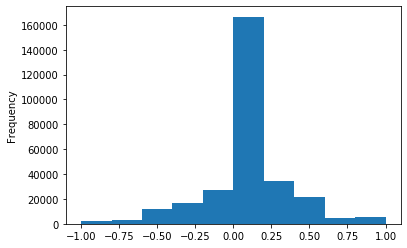

In [24]:
df['polarity'].plot.hist()

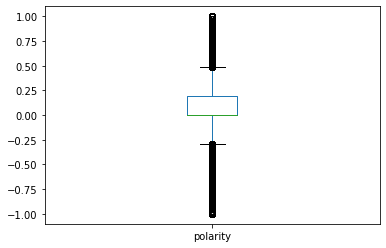

In [25]:
df['polarity'].plot.box()

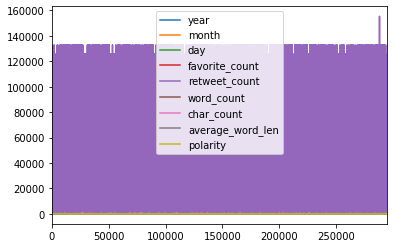

In [26]:
df.plot()

In [27]:
df.isna().any()

year                False
month               False
day                 False
user_name           False
favorite_count      False
retweet_count       False
text                False
user_location_ab    False
word_count          False
char_count          False
average_word_len    False
polarity            False
dtype: bool

In [28]:
df.count()

year                294528
month               294528
day                 294528
user_name           294528
favorite_count      294528
retweet_count       294528
text                294528
user_location_ab    294528
word_count          294528
char_count          294528
average_word_len    294528
polarity            294528
dtype: int64

In [29]:
df.to_csv('labeling_df.csv', encoding='utf-8', index=False)